In [44]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

In [45]:
stroke <- read_csv("stroke_data.csv") %>% as_tibble()
stroke

Parsed with column specification:
cols(
  id = col_double(),
  gender = col_character(),
  age = col_double(),
  hypertension = col_double(),
  heart_disease = col_double(),
  ever_married = col_character(),
  work_type = col_character(),
  Residence_type = col_character(),
  avg_glucose_level = col_double(),
  bmi = col_character(),
  smoking_status = col_character(),
  stroke = col_double()
)



id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>
9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61,0,0,Yes,Self-employed,Rural,202.21,N/A,never smoked,1
31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
19723,Female,35,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
37544,Male,51,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
44679,Female,44,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [59]:
stroke <- stroke %>%
  mutate(stroke = as_factor(stroke), 
         hypertension = as_factor(hypertension))

In [72]:
stroke_split <- initial_split(stroke, prop = 0.75, strata = stroke)
stroke_train <- training(stroke_split)
stroke_test <- testing(stroke_split)

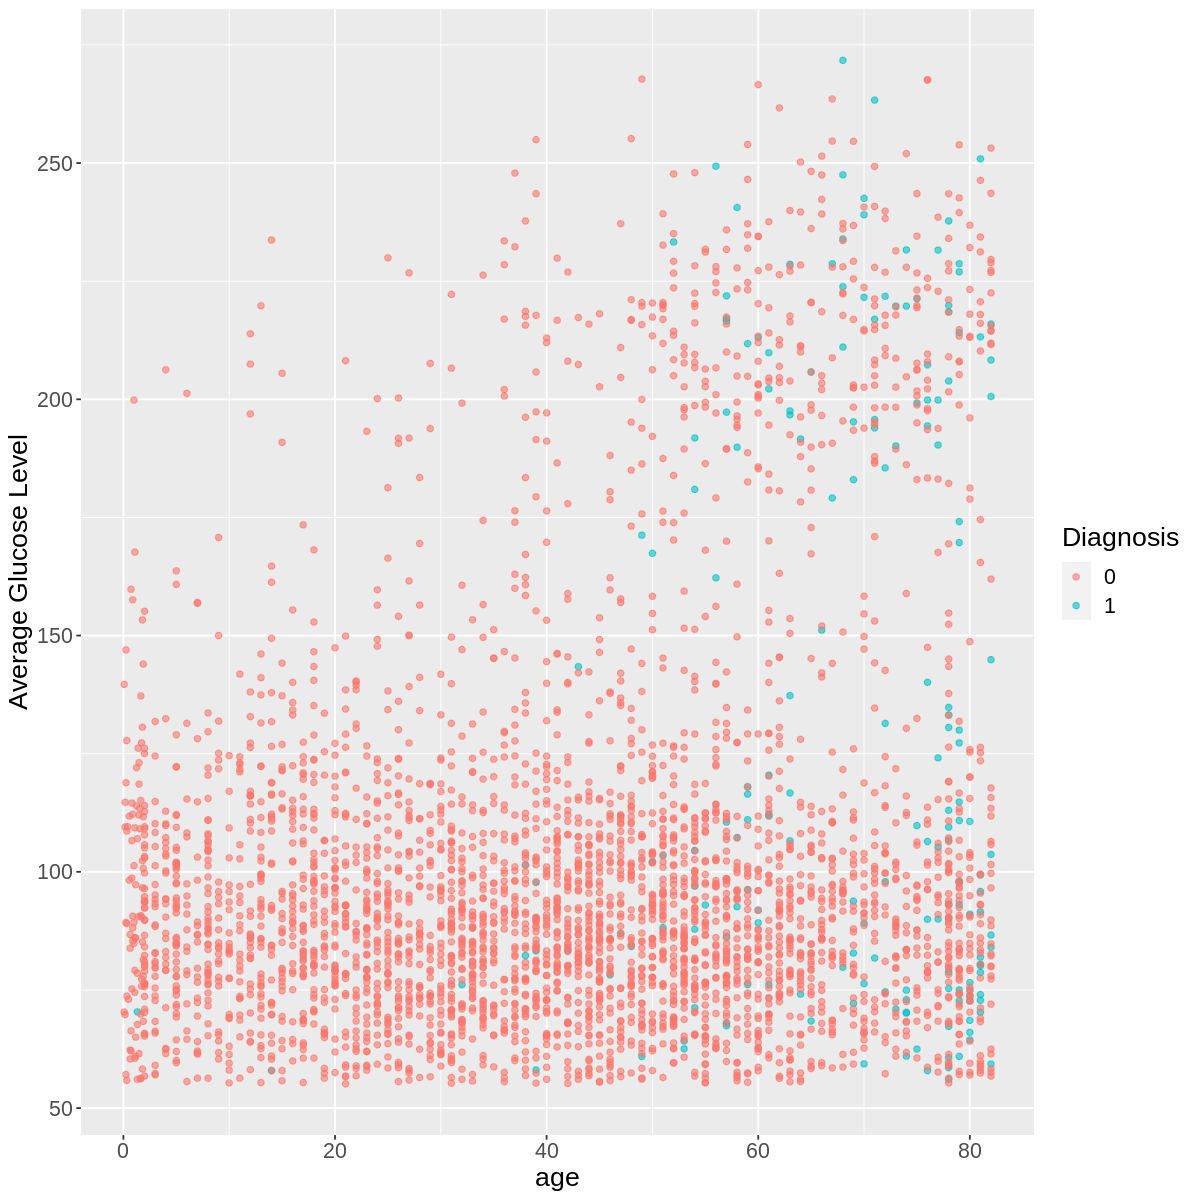

In [73]:
# Exploring the relation between bmi, average glucose level and whether there was a stroke
stroke_plot <- stroke_train %>%
  ggplot(aes(x = age, y = avg_glucose_level, color = stroke)) +
  geom_point(alpha = 0.6) +
  labs(x = "age",
       y = "Average Glucose Level",
       color = "Diagnosis") +
  theme(text = element_text(size = 16))
options(repr.plot.width = 10, repr.plot.height = 10)
stroke_plot

In [74]:
weather <- read_csv("weather.csv")
weather

Parsed with column specification:
cols(
  date = col_date(format = ""),
  precipitation = col_double(),
  temp_max = col_double(),
  temp_min = col_double(),
  wind = col_double(),
  weather = col_character()
)



date,precipitation,temp_max,temp_min,wind,weather
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
⋮,⋮,⋮,⋮,⋮,⋮
2015-12-29,0,7.2,0.6,2.6,fog
2015-12-30,0,5.6,-1.0,3.4,sun
2015-12-31,0,5.6,-2.1,3.5,sun


precipitation,temp_max,temp_min,wind,weather
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
-0.4534946,-0.4951296,-0.6439912,1.0146323,drizzle
1.1781945,-0.7944592,-1.0819761,0.8755334,rain
-0.3337376,-0.6447944,-0.2060063,-0.6545554,rain
⋮,⋮,⋮,⋮,⋮
-0.4534946,-1.257059,-1.519961,-0.4459070,fog
-0.4534946,-1.474754,-1.838496,0.1104890,sun
-0.4534946,-1.474754,-2.057488,0.1800384,sun


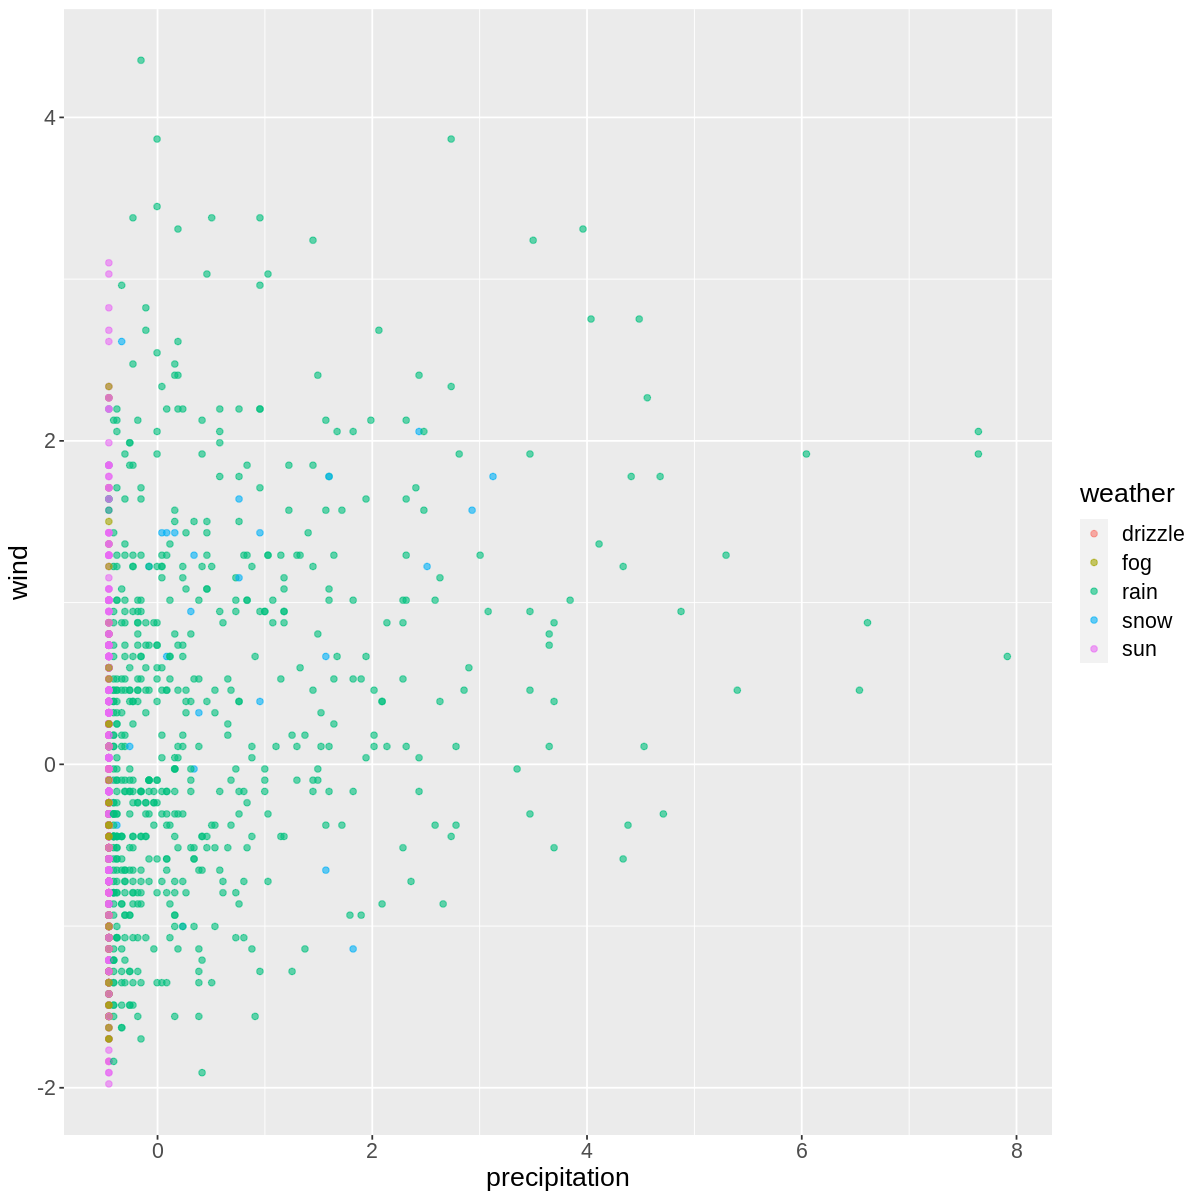

In [82]:
weather_recipe <- recipe(weather ~ precipitation + temp_max + temp_min + wind, data = weather) %>%
                        step_scale(all_predictors()) %>%
                        step_center(all_predictors())

weather_scaled <- weather_recipe %>%  
                            prep() %>% 
                            bake(weather)

weather_scaled

weather_plot <- weather_scaled %>%
ggplot(aes(x = precipitation, y = wind, color = weather)) +
  geom_point(alpha = 0.6) +
  labs(x = "precipitation",
       y = "wind",
       color = "weather") +
  theme(text = element_text(size = 16))
options(repr.plot.width = 10, repr.plot.height = 10)
weather_plot